Programming Assignment 1: Visualize Data Using a Chart

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ExcelFormattedGISTEMPDataCSV.csv')
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-29,-19,-17,-27,-13,-28,-22,-6,-16,-15,-18,-20,-19,***,****,-19,-19,-16
1,1881,-8,-13,2,-2,-3,-27,-5,-1,-8,-18,-25,-14,-10,-11,-13,-1,-11,-17
2,1882,10,10,2,-19,-17,-24,-9,5,0,-21,-20,-24,-9,-8,2,-11,-9,-14
3,1883,-32,-41,-17,-23,-24,-11,-7,-12,-18,-11,-19,-17,-19,-20,-32,-22,-10,-16
4,1884,-17,-11,-33,-35,-31,-37,-33,-25,-22,-22,-30,-28,-27,-26,-15,-33,-32,-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2011,50,51,64,66,53,59,74,73,56,67,56,53,60,60,50,61,69,60
132,2012,45,49,57,69,76,62,56,64,75,79,74,52,63,63,49,67,61,76
133,2013,67,57,65,54,61,65,59,66,77,70,81,67,66,64,58,60,63,76
134,2014,74,50,77,78,86,66,58,82,90,86,68,79,75,74,64,81,69,81


In [3]:
df.isnull().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     0
DJF     0
MAM     0
JJA     0
SON     0
dtype: int64

In [4]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-29,-19,-17,-27,-13,-28,-22,-6,-16,-15,-18,-20,-19,***,****,-19,-19,-16
1,1881,-8,-13,2,-2,-3,-27,-5,-1,-8,-18,-25,-14,-10,-11,-13,-1,-11,-17
2,1882,10,10,2,-19,-17,-24,-9,5,0,-21,-20,-24,-9,-8,2,-11,-9,-14
3,1883,-32,-41,-17,-23,-24,-11,-7,-12,-18,-11,-19,-17,-19,-20,-32,-22,-10,-16
4,1884,-17,-11,-33,-35,-31,-37,-33,-25,-22,-22,-30,-28,-27,-26,-15,-33,-32,-25


In [5]:
df.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

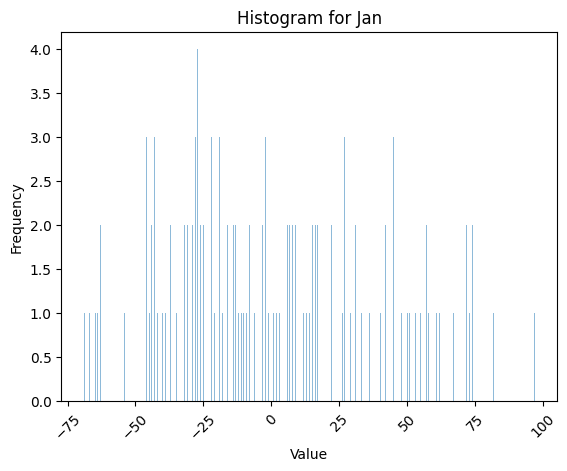

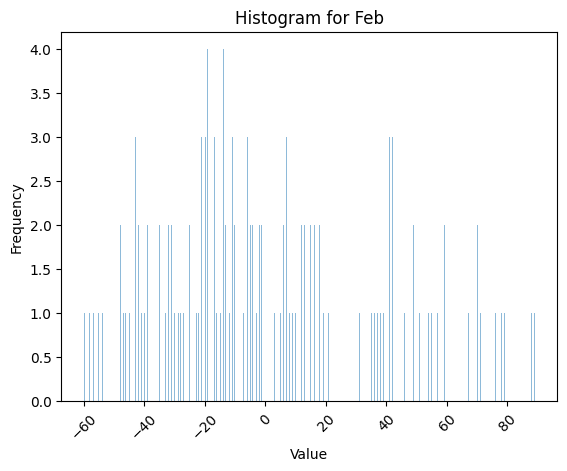

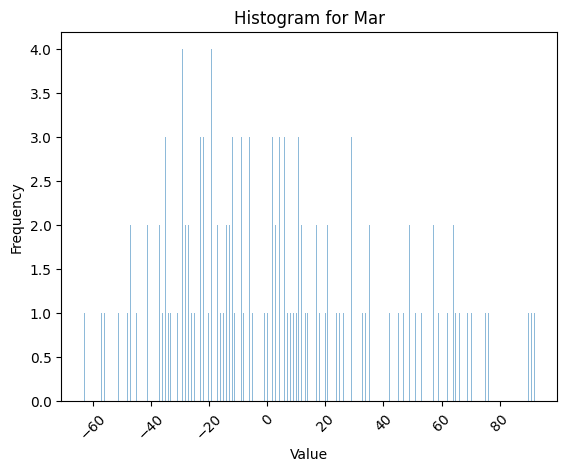

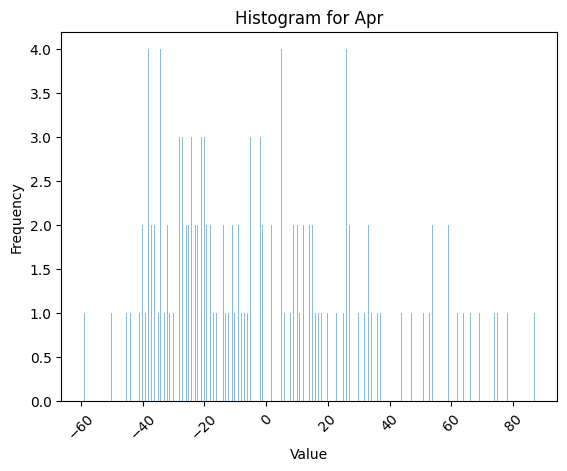

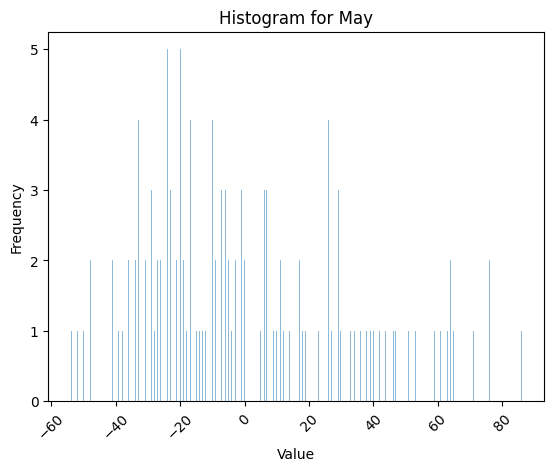

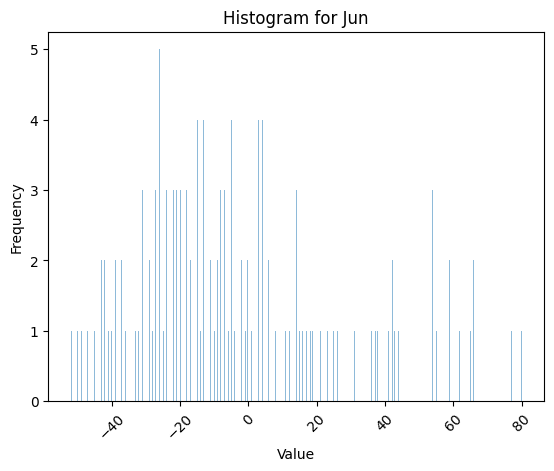

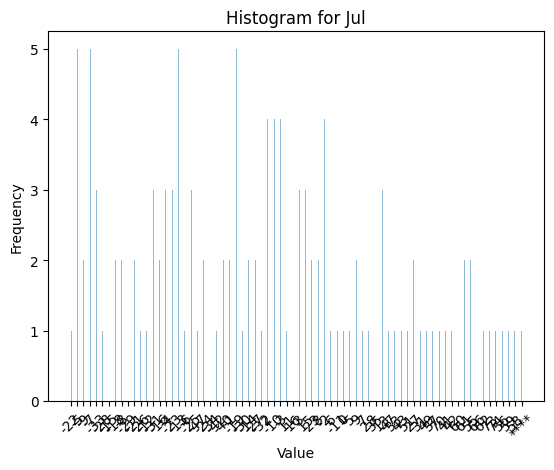

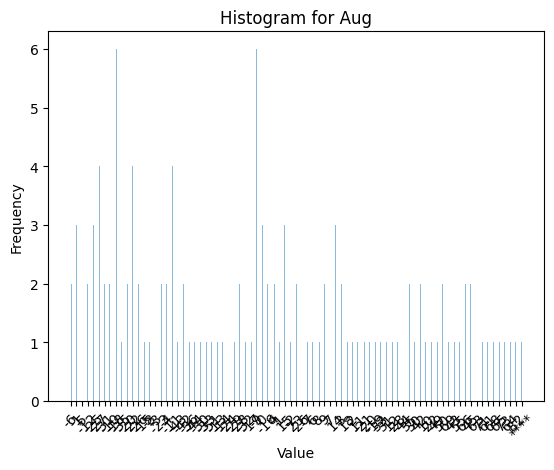

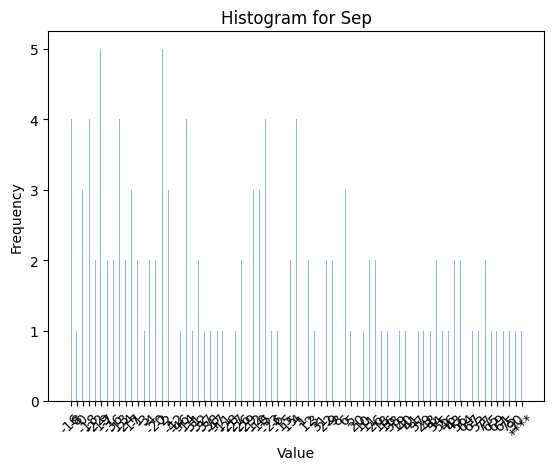

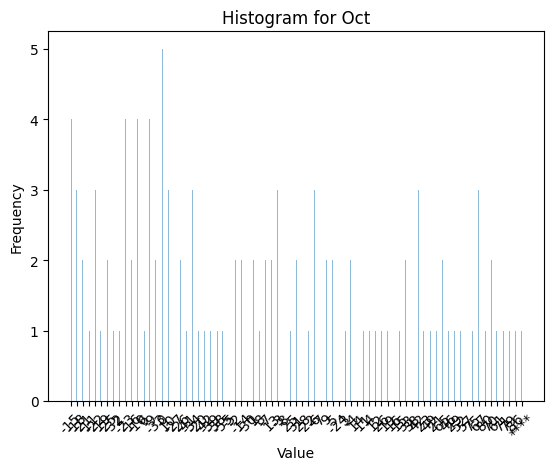

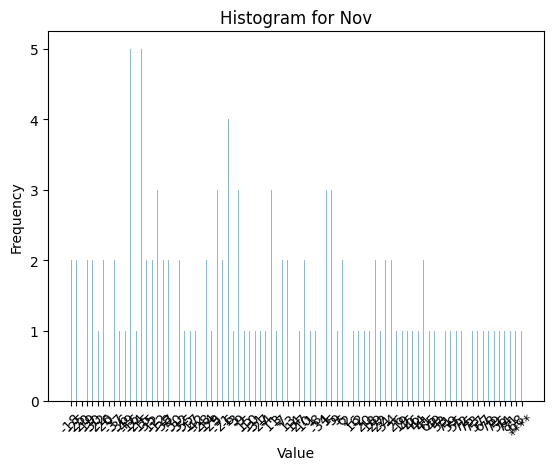

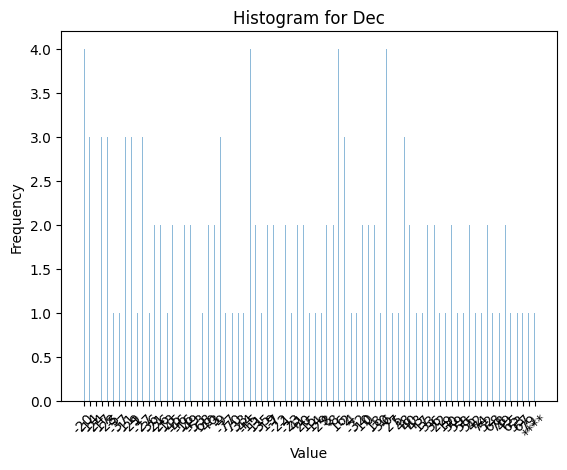

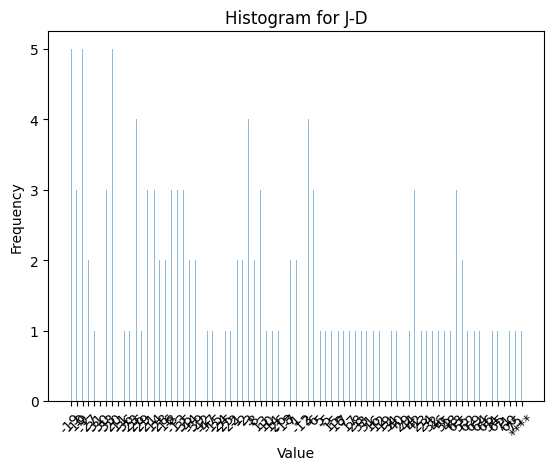

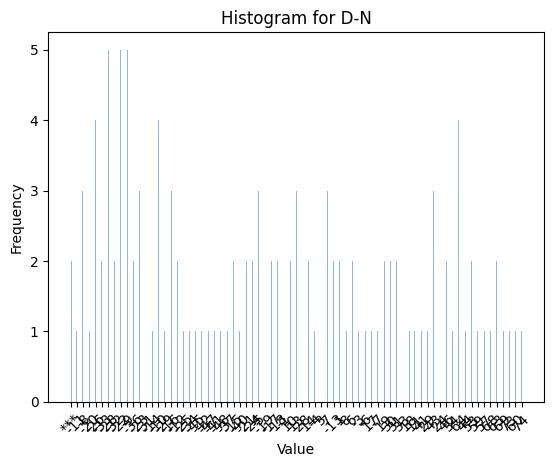

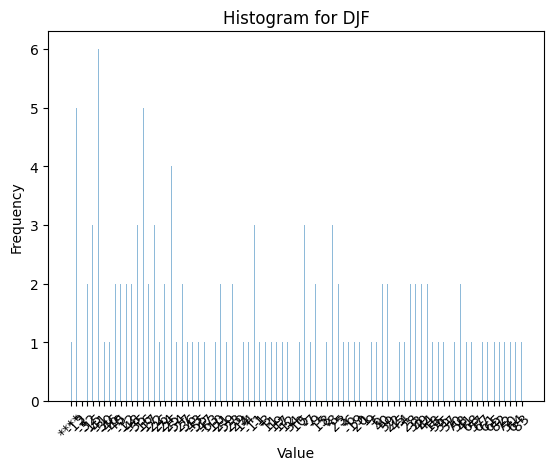

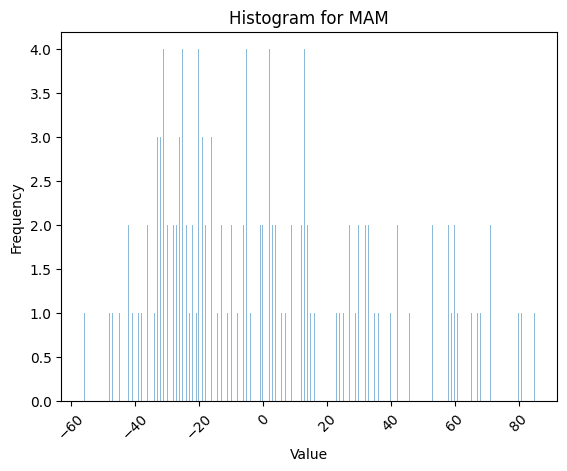

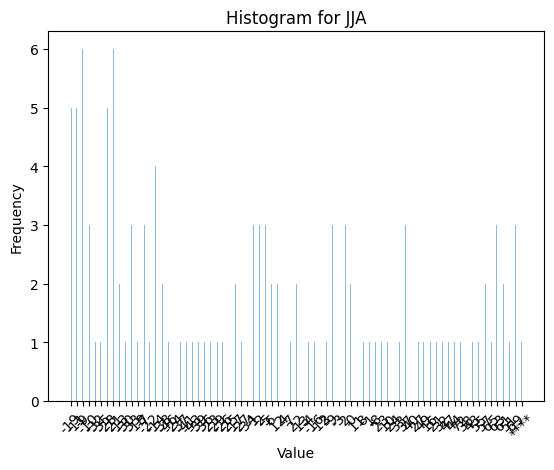

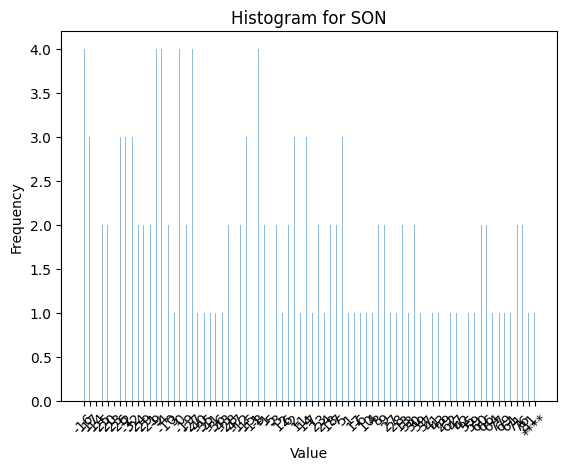

In [19]:
for column in df.columns:
    if column != 'Year':
        plt.figure()  # Create a new figure for each plot
        plt.hist(df[column], bins=500, alpha=0.5)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(f'Histogram for {column}')
        plt.xticks(rotation=45)
        plt.show()  # Display the current plot

In [20]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go

app = dash.Dash(__name__)

# Create a list of column names for the dropdown options
columns = df.columns[1:].tolist()

# Define the app layout
app.layout = html.Div([
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': column, 'value': column} for column in columns],
        multi=True,  # Allow multiple column selection
        value=columns[0:3]  # Initial selection
    ),
    html.Div(id='line-plots')
])

# Callback to update the line plots
@app.callback(
    Output('line-plots', 'children'),
    Input('column-dropdown', 'value')
)
def update_line_plots(selected_columns):
    line_plots = []
    for column in selected_columns:
        line_plot = dcc.Graph(
            id=f'line-plot-{column}',
            config={'displayModeBar': False},
        )
        fig = go.Figure(data=[
            go.Scatter(x=df['Year'], y=df[column], mode='lines+markers')
        ])
        fig.update_layout(
            xaxis_title='Year',
            yaxis_title=column,
            title=f'Interactive Line Plot: {column}'
        )
        line_plot.figure = fig
        line_plots.append(line_plot)
    return line_plots

if __name__ == '__main__':
    app.run_server(debug=True)